### ARIMA Model Example - Jason Brownlee
* https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

In [10]:
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [2]:
# Read in csv file and parse MOnth to datetime
# shampoo.Month = pd.to_datetime(shampoo.Month)
shampoo = pd.read_csv("Resources/ShampooData.csv", parse_dates=['Month'])

In [4]:
shampoo.head()
shampoo.dtypes
# shampoo.isna().sum()

Month    datetime64[ns]
Sales           float64
dtype: object

In [5]:
shampoo.head()

,Month,Sales
0,2017-01-01,266.0
1,2017-02-01,145.9
2,2017-03-01,183.1
3,2017-04-01,119.3
4,2017-05-01,180.3


In [ ]:
print(shampoo.info())

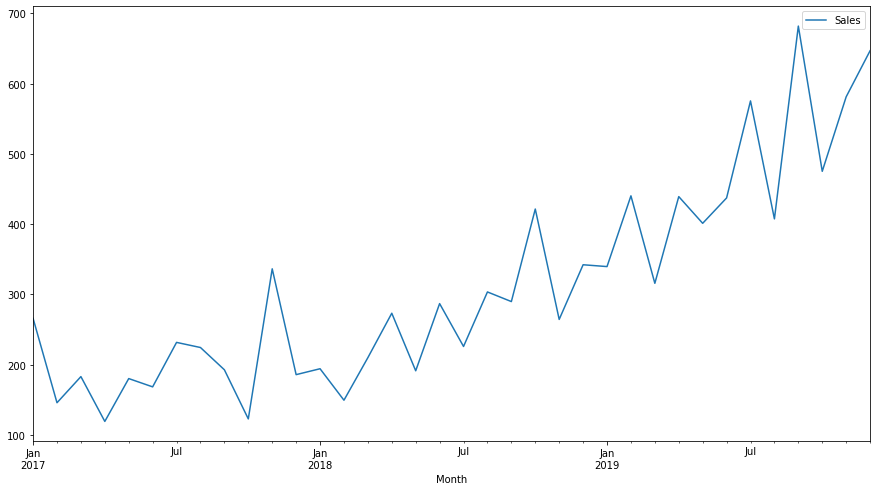

In [14]:
shampoo.plot(x='Month', y='Sales', figsize=(15,8))


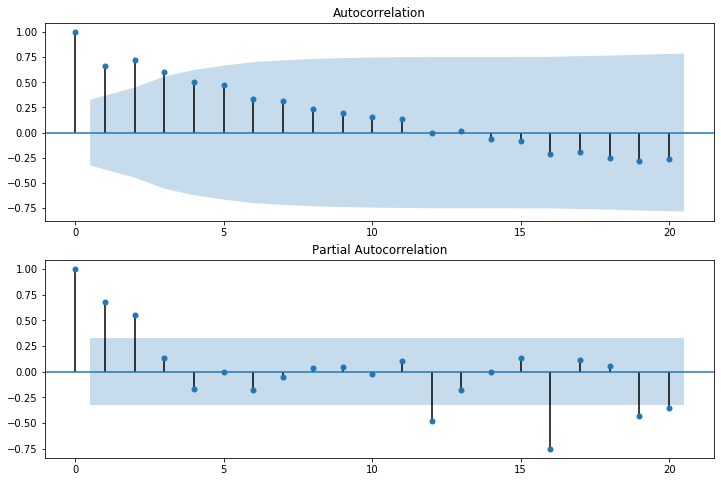

In [22]:
# Plot ACF (MA model) and PACF (AR model)
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(shampoo['Sales'], lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(shampoo['Sales'], lags=20, ax=ax2)
plt.show()

In [45]:
# fit model

from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(shampoo["Sales"], order=(2,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())


                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -197.814
Method:                       css-mle   S.D. of innovations             67.833
Date:                Tue, 21 Jul 2020   AIC                            403.628
Time:                        14:29:31   BIC                            409.849
Sample:                             1   HQIC                           405.775
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.6504      4.907      2.374      0.018       2.034      21.267
ar.L1.D.Sales    -1.0223      0.167     -6.109      0.000      -1.350      -0.694
ar.L2.D.Sales    -0.3655      0.167     

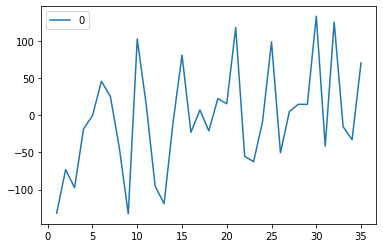

In [42]:
# plot residual errors. We get a line plot of the residual errors, 
# suggesting that there may still be some trend information not captured by the model.

from pandas import DataFrame

residuals = DataFrame(model_fit.resid)
residuals.plot()

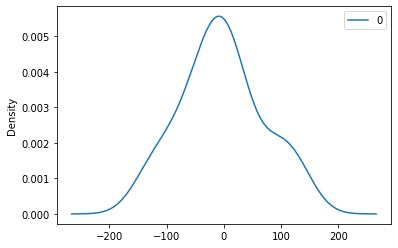

In [46]:
# We get a density plot of the residual error values, 
# suggesting the errors are Gaussian, but may not be centered on zero.

residuals.plot(kind='kde')


In [47]:
# The distribution of the residual errors is displayed. The results show that 
# indeed there is a bias in the prediction (a non-zero mean in the residuals).

print(residuals.describe())

                0
count   35.000000
mean    -3.927333
std     71.118405
min   -132.795705
25%    -47.082981
50%     -8.308474
75%     23.822062
max    133.295961


predicted=363.496552, expected=342.300000
predicted=315.472115, expected=339.700000
predicted=390.187058, expected=440.400000
predicted=334.199207, expected=315.900000
predicted=393.432188, expected=439.300000
predicted=369.929007, expected=401.300000
predicted=451.510548, expected=437.400000
predicted=388.957360, expected=575.500000
predicted=472.271241, expected=407.600000
predicted=507.257888, expected=682.000000
predicted=471.661340, expected=475.300000
predicted=634.259486, expected=581.300000
predicted=539.786240, expected=646.900000
Test MSE: 6998.940


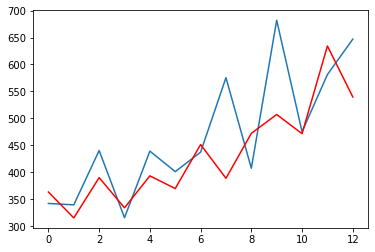

In [51]:
# Example of a rolling forecast with the ARIMA model in Python.

from sklearn.metrics import mean_squared_error

X = shampoo["Sales"].values

size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(3,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()